GITHUB: https://github.com/itsJ1mbo/AAMD_P5_Unity

In [18]:
#inclusiones

import MLP_Complete as mlp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Utils as utl

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [19]:
# lectura de los datos

data = pd.read_csv('preprocessedData.csv')
print(data)

       NEIGHBORHOOD_DIST_UP  NEIGHBORHOOD_DIST_DOWN  NEIGHBORHOOD_DIST_RIGHT  \
0                 -0.684733               -0.726171                -0.616927   
1                 -0.684733               -0.726171                -0.616927   
2                 -0.684733               -0.726171                -0.616927   
3                 -0.684733               -0.726171                -0.616927   
4                 -0.684733               -0.726171                -0.616927   
...                     ...                     ...                      ...   
29248             -0.646427               -0.707525                -0.682511   
29249             -0.646427               -0.707525                -0.682511   
29250             -0.646427                1.138425                -0.682511   
29251             -0.572579                1.064587                -0.682511   
29252             -0.480270                0.972289                -0.638185   

       NEIGHBORHOOD_DIST_LEFT  AGENT_1_

In [20]:
# separa los datos en datos de entrenamiento y datos de testeo (dividir tmb en datos de confirmacion???)

# coge todos los datos menos la columna de action (la solucion)
X = data.drop('action', axis=1).values

# convierte la columna de action en una tabla bidimensional de trues y falses indicando que accion esta en cada caso
y = pd.get_dummies(data['action']).values
#print(y)

y_labels = data['action'].values
print(y_labels)

# separa los datos ->
# y_train_lbl; y_test_lbl -> se refiere a las columnas de action que estan procesadas como labeled
# no se si hace falta separar tmb los labeles, es literalmente lo que es y lmao
X_train, X_test, y_train, y_test, y_train_lbl, y_test_lbl = train_test_split(
    X, y, y_labels, random_state=42, test_size=0.33, shuffle=True
)

#print(y_train_lbl)
#print(y_test_lbl)

[0 0 0 ... 4 2 2]


A.) MLP Classifier Complete

In [ ]:
LAYERS=(62, 70)
LAMBDA=0.001
LR_INIT=0.5
ITERATIONS=10000


# guardando info de otra iteraciones
# 68,70 -> 75,95
# 70,70 -> 76,48
# 75,70 -> 76.15
# 70,100 -> ?

# 70, 70; 0,5 lr; 6k it -> 77.44


In [ ]:
# MAX ACC 3 capas ocultas
#LAYERS=(62, 70, 90)
#LAMBDA=0.001
#LR_INIT=0.5
#ITERATIONS=10000
# acc = 79,73
# si que es verdad que tarda mas de 40mins -> probablemente sea un problema con el modelo y no con los datos por el gran coste de entrenamiento

# MAX ACC 2 capas ocultas
#LAYERS=(62, 70)
#LAMBDA=0.001
#LR_INIT=0.5
#ITERATIONS=10000
# acc = 80.04

mlp_custom = mlp.MLP_Complete(inputLayer=X_train.shape[1], hiddenLayers=list(LAYERS), outputLayer=y_train.shape[1], seed=42)
mlp_custom.backpropagation(X_train, 
                        y_train, 
                        alpha=LR_INIT, 
                        lambda_=LAMBDA, 
                        numIte=ITERATIONS, 
                        verbose=100)

a, z = mlp_custom.feedforward(X_test)
y_pred_custom = mlp_custom.predict(a[-1])
    
acc_custom = accuracy_score(np.argmax(y_test, axis=1), y_pred_custom)

print(f"-> Validacion Custom MLP: {acc_custom * 100:.2f}%")

Iteration      1: Cost   3.3674   
Iteration    101: Cost   1.9980   
Iteration    201: Cost   1.8661   
Iteration    301: Cost   1.7923   
Iteration    401: Cost   1.7028   
Iteration    501: Cost   1.6507   
Iteration    601: Cost   1.6171   
Iteration    701: Cost   1.5881   
Iteration    801: Cost   1.5635   
Iteration    901: Cost   1.5429   
Iteration   1001: Cost   1.5251   
Iteration   1101: Cost   1.5092   
Iteration   1201: Cost   1.4948   
Iteration   1301: Cost   1.4812   
Iteration   1401: Cost   1.4681   
Iteration   1501: Cost   1.4550   
Iteration   1601: Cost   1.4414   
Iteration   1701: Cost   1.4272   
Iteration   1801: Cost   1.4126   
Iteration   1901: Cost   1.4210   
Iteration   2001: Cost   1.4031   
Iteration   2101: Cost   1.3892   
Iteration   2201: Cost   1.3766   
Iteration   2301: Cost   1.3647   
Iteration   2401: Cost   1.3535   
Iteration   2501: Cost   1.3430   
Iteration   2601: Cost   1.3333   
Iteration   2701: Cost   1.3241   
Iteration   2801: Co

KeyboardInterrupt: 

In [22]:
mlp_sklearn = MLPClassifier(
        hidden_layer_sizes=LAYERS,
        activation='logistic',     
        solver='sgd',             
        max_iter=ITERATIONS,
        learning_rate="constant",
        learning_rate_init=LR_INIT,
        alpha=LAMBDA,             
        random_state=42,
        n_iter_no_change=100,
        verbose=True
    )

mlp_sklearn.fit(X_train, y_train_lbl)

y_pred_sklearn = mlp_sklearn.predict(X_test)

acc_sklearn = accuracy_score(y_test_lbl, y_pred_sklearn)

print(f"-> Validacion SKLearn MLP: {acc_sklearn * 100:.2f}%")

Iteration 1, loss = 1.30357637
Iteration 2, loss = 0.95487493
Iteration 3, loss = 0.85103572
Iteration 4, loss = 0.81021905
Iteration 5, loss = 0.77357451
Iteration 6, loss = 0.74774237
Iteration 7, loss = 0.72713708
Iteration 8, loss = 0.70517662
Iteration 9, loss = 0.68893776
Iteration 10, loss = 0.67299731
Iteration 11, loss = 0.65479839
Iteration 12, loss = 0.64592422
Iteration 13, loss = 0.63060941
Iteration 14, loss = 0.61555085
Iteration 15, loss = 0.60986029
Iteration 16, loss = 0.59872907
Iteration 17, loss = 0.58771574
Iteration 18, loss = 0.58315934
Iteration 19, loss = 0.57284336
Iteration 20, loss = 0.56360918
Iteration 21, loss = 0.56268138
Iteration 22, loss = 0.55603651
Iteration 23, loss = 0.54970434
Iteration 24, loss = 0.54190252
Iteration 25, loss = 0.53708642
Iteration 26, loss = 0.53382902
Iteration 27, loss = 0.53217010
Iteration 28, loss = 0.52506374
Iteration 29, loss = 0.52255806
Iteration 30, loss = 0.51749822
Iteration 31, loss = 0.51743948
Iteration 32, los

B.) Comparacion con el MLP Classifier de SKLearn

In [7]:
if abs(acc_custom - acc_sklearn) < 0.1:
    print("Los modelos se parecen en un rango del 10%")
else:
    print("Hay diferencia notable entre ambos modelos")

print(f"-> Validacion Custom MLP: {acc_custom * 100:.2f}%")
print(f"-> Validacion SKLearn MLP: {acc_sklearn * 100:.2f}%")

Los modelos se parecen en un rango del 10%
-> Validacion Custom MLP: 77.55%
-> Validacion SKLearn MLP: 84.56%


C.) MLP Classifier de SKLearn 

In [8]:
LAYERS=(62, 70)
LAMBDA=0.001
LR_INIT=0.01
ITERATIONS=2000

mlp_sklearn = MLPClassifier(
        hidden_layer_sizes=LAYERS,
        activation='logistic',     
        solver='sgd',             
        max_iter=ITERATIONS,
        learning_rate="constant",
        learning_rate_init=LR_INIT,
        alpha=LAMBDA,             
        random_state=42,
        n_iter_no_change=100,
        verbose=True
    )

mlp_sklearn.fit(X_train, y_train_lbl)

y_pred_sklearn = mlp_sklearn.predict(X_test)

acc_sklearn = accuracy_score(y_test_lbl, y_pred_sklearn)

print(f"-> Validacion SKLearn MLP: {acc_sklearn * 100:.2f}%")

Iteration 1, loss = 1.50307985
Iteration 2, loss = 1.46648103
Iteration 3, loss = 1.38100450
Iteration 4, loss = 1.23396796
Iteration 5, loss = 1.15962087
Iteration 6, loss = 1.13363099
Iteration 7, loss = 1.11938624
Iteration 8, loss = 1.10723440
Iteration 9, loss = 1.09363520
Iteration 10, loss = 1.07751722
Iteration 11, loss = 1.05882348
Iteration 12, loss = 1.04046633
Iteration 13, loss = 1.02450281
Iteration 14, loss = 1.01305852
Iteration 15, loss = 1.00465436
Iteration 16, loss = 0.99837871
Iteration 17, loss = 0.99350510
Iteration 18, loss = 0.98941365
Iteration 19, loss = 0.98510853
Iteration 20, loss = 0.98100627
Iteration 21, loss = 0.97766394
Iteration 22, loss = 0.97420158
Iteration 23, loss = 0.97090991
Iteration 24, loss = 0.96747385
Iteration 25, loss = 0.96417207
Iteration 26, loss = 0.96146899
Iteration 27, loss = 0.95842715
Iteration 28, loss = 0.95507409
Iteration 29, loss = 0.95214641
Iteration 30, loss = 0.94959326
Iteration 31, loss = 0.94679255
Iteration 32, los

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


D.) KNN

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train_lbl)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test_lbl, y_pred_knn)

print(f"-> Validacion KNN: {acc_knn * 100:.2f}%")

c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^

-> Validacion KNN: 81.68%


E.) Decision Tree & Random Forest TODO

In [ ]:
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train_lbl)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test_lbl, y_pred_dt)

print(f"-> Validacion DT: {acc_dt * 100:.2f}%")

rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf.fit(X_train, y_train_lbl)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test_lbl, y_pred_rf)

print(f"-> Validacion RF: {acc_rf * 100:.2f}%")

-> Validacion DT: 86.85%
-> Validacion RF: 88.45%


F.) Matriz de Confusion y otras metricas TODO

Text(0.5, 1.0, 'DT\nAcc: 88.45%')

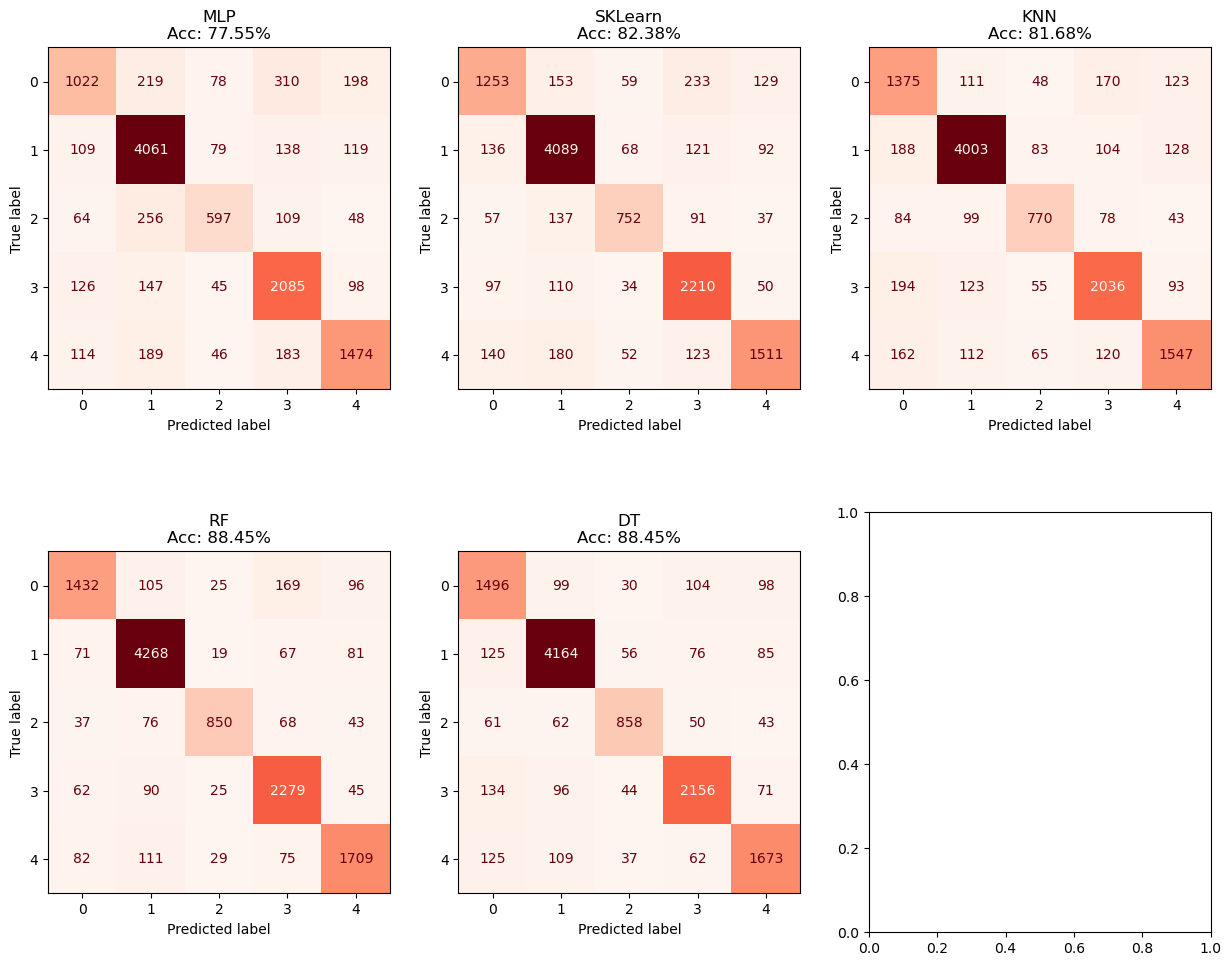

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(15, 12))
axes = axes.flatten()
ConfusionMatrixDisplay.from_predictions(y_test_lbl, y_pred_custom, ax=axes[0], cmap="Reds", colorbar=False)
axes[0].set_title(f"MLP\nAcc: {acc_custom * 100:.2f}%")
ConfusionMatrixDisplay.from_predictions(y_test_lbl, y_pred_sklearn, ax=axes[1], cmap="Reds", colorbar=False)
axes[1].set_title(f"SKLearn\nAcc: {acc_sklearn * 100:.2f}%")
ConfusionMatrixDisplay.from_predictions(y_test_lbl, y_pred_knn, ax=axes[2], cmap="Reds", colorbar=False)
axes[2].set_title(f"KNN\nAcc: {acc_knn * 100:.2f}%")
ConfusionMatrixDisplay.from_predictions(y_test_lbl, y_pred_rf, ax=axes[3], cmap="Reds", colorbar=False) 
axes[3].set_title(f"RF\nAcc: {acc_rf * 100:.2f}%")
ConfusionMatrixDisplay.from_predictions(y_test_lbl, y_pred_dt, ax=axes[4], cmap="Reds", colorbar=False) 
axes[4].set_title(f"DT\nAcc: {acc_rf * 100:.2f}%")

El modelo que mas puntuacion de validacion tiene de todos los que hemos probado es claramente el Random Forest con un aplastante 88.7% de accuracy o validacion.

No obstante, el Random Forest es un modelo de caja gris, es decir, no es completamente explicable y es claramente menos explicable que los Arboles de decision (DT) y los vecinos (KNN); estos dos modelos han obtenido puntuaciones un poco mas bajas, de 82.92% y 80.58% brespectivamente; aun teniendo puntuaciones mas bajas, su explicabilidad les da bastante puntos a favor, puntos que se les quitan por ser ambos muy sensibles al ruido: en nuestro caso, movimientos que no son necesariamente utiles pero que el jugador puede hacer igualmente. 

Por otro lado, el MLP de SKLearn ha conseguido una puntuacion de 85.33%, sin embargo, las redes neuronales son modelos de caja negra (no explicables) y, a la hora de hacer una ia para un juego, esta bien saber de donde vienen las decisiones tomadas por el modelo para asi poder optimizarlo o modificar su dificultad; además, es muy costoso entrenar una red neuronal como el perceptron multicapa, asi como lo es entrenar un modelo de KNN.

Dicho todo esto, la decisión que más sentido tiene es el RF que, además de tener buena puntuacion de validacion, tiene un gran ration tiempo de entrenamiento-calidad de los resultados y no pierde toda su explicabilidad al ser de caja gris.


G.) Exportar

In [23]:
utl.ExportAllformatsMLPSKlearn(mlp_sklearn, X, "picle_format", "onix_format", "json_format", "custom_format.txt")

Capa  coefficient
procesando  coefficient
['31', '65']
coefficient
[-2.1730858464781777, -2.325215520970332, 10.311755424906071, -0.7776242522474248, -0.3831068652868508, -0.6129697521956453, -7.335574612939356, 0.8640888413241602, 0.3757482836751152, 2.674162645306056, -3.2496677978820316, 0.8062070427689207, -1.6162004040138813, 2.6173567543184197, -7.5696869944670935, -1.2193592295850317, 10.915248111081445, 2.788172679850282, -1.23455061246419, -2.017055475583684, -1.5823615974110607, -2.082885356366065, 1.9846648167274419, -2.131388414547075, -3.853591921547795, -1.9482404581489137, -4.690473610975772, -4.307454206507875, -9.98788445006822, 3.3957882848312457, 3.520278436635649, 2.336320734075791, 0.22772328014585452, -4.222356374302282, -0.6373177937692737, 1.202332572735754, 1.8127241943335612, -0.6901936831516429, -4.000057205331478, -2.532359383961678, -5.055347820742711, 1.576959083297096, -0.19569306065607486, -1.6838387059165696, -3.459805804273237, 1.035169321212636, -6.44